# Understanding principal component analysis 

In this post, we'll take a deep dive into PCA, from both a mathematical and implementation perspective.
We'll derive the equation from the ground up, look at how we can compute it and finally end with what it can be used for. This post is primarily targeted at those with a basic understanding of PCA but want to know the assumptions it relies on, its properties and how it can be computed.

## Background

## The optimal coding perspective

### Finding a low dimensional representation
PCA can be thought of as finding a low-dimensional representation of a set of vectors. Given points in an _n_-dimensional space, we might wish to find some new _k_-dimensional space (with _k_ < _n_) which captures as much of the _essence_ of the original space as possible. The exact definition of capturing the '_essence_' is subject to design, however, we can consider it from multiple perspectives. 

![](diagrams/pca.svg)

### The notion of reconstruction error
If we take our low-dimensional representation and attempt to recover the original _n_-dimensional vector of each point, we could measure how much each point varies from its reconstruction. The difference between each reconstruction and the original, is one way of measuring the effectiveness of our new _k_-dimensional space and is the approach taken by PCA.  Naturally, this requires a definition of a _similarity_ between two matrices. If we have a matrix $X$ of our original points and our reconstruction $X'$ then we can define the difference between them as a sum of the square of errors $\sum_{i,j} (X-X')_{i,j}^2$.

This quantity is known as the _Frobenius_ norm of the matrix $X-X'$ and is essentially an extension of the L2 ($||\mathbf{v}|||_2^2 =  \sum_i \mathbf{v}_i^2 = \mathbf{v}^\top \mathbf{v}$) norm from vectors to matrices. Crucially, however, we can see that the Frobenius norm of a matrix, $A$, is precisely equivalent to $Tr[A^\top A]$ (see the visual illustration below).

![](diagrams/media/videos/frobenius_animation/1440p60/FrobeniusScene.mp4)


As a result, our error of interest, can be computed as $Tr[(X-X')^\top (X-X')]$.




### PCA Assumptions
PCA chooses to implement this transformation as a matrix multiplication. We wish to discover some matrix $D$ that will transform our input, $X$ to our coded version $C$ by a matrix multiplication (i.e. $C = XD$). In this sense, we can understand $D$ as a linear transformation operating on the original design matrix $X$.
The matrix, $X$, being our original data of $m$ rows and $n$ columns.

We might choose, however, to use some matrix, $D_k$ which reduces the number of dimensions of our data from $m$ to $k$. To make it easier, we can index the matrix with the new number of dimensions, $k$. If this is the case, then $D_k$ is of size $n \times k$ and so that the resulting coding, $C$, is of size $m \times k$.

One of the most crucial assumptions made by PCA is that the transformation matrix, $D_k$, has __orthogonal__ columns. Criticially, this does not, technically, make it an __orthogonal__ matrix since it may not be square but, however, does mean that the reconstruction, $X'$ can be computed as $XD_kD_k^\top$. To understand exactly why the reconstruction can be performed by the transpose of the matrix see [here (page 46)](http://www.deeplearningbook.org/contents/linear_algebra.html).

This means that formally, for some given value $k$, we wish to discover the matrix $D_k$. 
$$D_k^* = argmin_{D_k} ||X-X'||_F =  argmin_{D_k} ||X-XD_kD_k^\top||_F$$


### Discovering the coding function

Given that we wish to minimise the reconstruction error, let us attempt to discover the transformation precisely capable of this.








From the visual illustration, recall that we can write the reconstruction error, R, as $Tr((X-XD_kD_k^\top)^\top(X-XD_kD_k^\top))$.

This can be expanded further into $\text{argmin}_{D_k}Tr(X^\top X -X^\top XD_kD_k^\top - D_kD_k^\top X^\top X + D_kD_k^\top X^\top XD_kD_k^\top)$ by using the following rules $(A+B)^\top = A^\top + B^\top$, $(AB)^\top = B^\top A^\top$ and $(A^\top)^\top = A$

We are, however, only interested in the effect of the matrix $D_k$ so we'll write this as $\text{argmin}_{D_k}\text{Tr}(-X^\top XD_kD_k^\top - D_kD_k^\top X^\top X + D_kD_k^\top X^\top XD_kD_k^\top)$


## The decorrelation perspective

It's crucial to understand that a zero covariance does not imply that no relationship exists between the features of the transformed space but rather that no linear relationship can exist.

## The axis transformation perspective

## Relationship with eigendecomposition

## Relationship with singular value decomposition

### Example uses using our implementation from scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_noisy_line(gradient, N=100):
    N = 100
    X = np.zeros(shape=(N, 2))
    X[:,0] = np.random.uniform(-100, 100, size=N)
    X[:,1] = (X[:,0]*gradient)+ np.random.uniform(-100, 100, size=N)
    return X
# plt.scatter(x, y)

In [4]:
def pca_eig(X):
    # X = whiten(X)
    N = X.shape[0]
    # eigenvals, eigenvectors = np.linalg.eig(1/N * (X.T @ X))
    eigenvals, eigenvectors = np.linalg.eig((X.T @ X))
    # w, v = np.linalg.eigh((X.T @ X))
    return eigenvals, eigenvectors

def pca_svd(X):
    _,_,x = np.linalg.svd(X)
    return x

def whiten(X):
    return (X-np.mean(X, axis=0))#/np.std(X, axis=0)

[[-0.97428691 -0.22531092]
 [ 0.22531092 -0.97428691]]
[[-0.22531092 -0.97428691]
 [-0.97428691  0.22531092]]


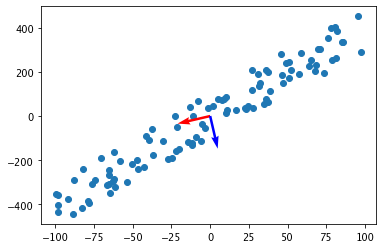

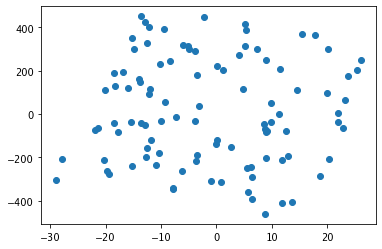

In [9]:
X = generate_noisy_line(4)
_,eig_dec = pca_eig(X)
svd_dec = pca_svd(X)
plt.scatter(X[:,0], X[:,1])
print(eig_dec)
print(svd_dec)
origin = [0,0]
eig_vec1, eig_vec2 = eig_dec[0, :], eig_dec[1,:]
plt.quiver(*origin, *eig_vec1, color=['r'], scale=10)
plt.quiver(*origin, *eig_vec2, color=['b'], scale=10)
plt.show()

Z = X@eig_dec
plt.scatter(Z[:,0], Z[:,1])

In [6]:
from sklearn.decomposition import PCA
fitted = PCA().fit(X)

In [7]:
fitted.components_

array([[ 0.22559108,  0.97422208],
       [-0.97422208,  0.22559108]])

In [145]:
_,_,D_prime = np.linalg.svd(X)
print(D_prime)

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


### Eigenfaces

In [26]:
from PIL import Image
import glob
dims = (40,60)
images = [Image.open(n).convert("L").resize((dims[0], dims[1])) for n in glob.glob('photos/utkcropped/*.jpg')]
# images = [Image.open(n).convert("L").resize((dims[0], dims[1])) for n in glob.glob('photos/*.png')]
imag_arr = np.zeros(shape=(len(images), dims[0]*dims[1]))
for i in range(len(images)):
    imag_arr[i, :] = np.array(images[i]).reshape(1, dims[0]*dims[1])
# for i in range(1,5):

#     X[i, :] = np.array().reshape(1, dims[0]*dims[1]))

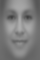

In [11]:
Image.fromarray(np.uint8(np.mean(imag_arr, axis=0)).reshape(dims[1], dims[0]))

In [12]:
w,D_eig = pca_eig(imag_arr)
D_eig

array([[-0.01449769,  0.02432601,  0.01800359, ..., -0.00260456,
        -0.00424974, -0.00322823],
       [-0.01410733,  0.02340599,  0.01990105, ..., -0.00032233,
         0.00464777,  0.00052506],
       [-0.01403792,  0.0218387 ,  0.02165501, ...,  0.00910833,
         0.00449913,  0.00365528],
       ...,
       [-0.0173794 ,  0.03519392, -0.01486302, ..., -0.00027073,
         0.00219523,  0.00076805],
       [-0.01741188,  0.03576593, -0.0135625 , ..., -0.00097625,
         0.00040196, -0.00218996],
       [-0.01748186,  0.03596164, -0.01234977, ..., -0.00168592,
         0.00066804, -0.00050403]])

In [27]:
D = pca_svd(imag_arr)
D

array([[-0.0327061 , -0.03150882, -0.03071861, ..., -0.02212203,
        -0.02213526, -0.02261451],
       [-0.02215797, -0.02766727, -0.03256112, ..., -0.01051414,
        -0.01425937, -0.01329424],
       [-0.06117763, -0.05406349, -0.03734055, ...,  0.03487309,
         0.02982214,  0.02201364],
       ...,
       [-0.01249382,  0.00459081, -0.01046419, ...,  0.990676  ,
        -0.00817422, -0.00452857],
       [-0.01620377, -0.00514071, -0.0100943 , ..., -0.00827202,
         0.99157679, -0.00600857],
       [-0.02322883, -0.02205798, -0.00161522, ..., -0.00522722,
        -0.00638262,  0.98775798]])

In [1]:
n_c = 400
comps = np.argsort(-1*np.abs(w))[:n_c]
proj = D_eig[:,:n_c]
test_im = imag_arr[0,:]
# rec = ((proj.T@(proj@test_im))+np.mean(imag_arr, axis=0)).reshape((dims[1], dims[0]))
# rec = (proj.T@(proj@test_im)).reshape((dims[1], dims[0]))
rec = (test_im@proj@proj.T).reshape((dims[1], dims[0]))
print(rec)
Image.fromarray(np.uint8(scale(rec)))

NameError: name 'np' is not defined

[[217.35281234 203.13889634 147.64387957 ...  61.09967132  76.27780785
   89.03547935]
 [210.20052004 215.5562819  127.88128935 ...  63.16587927  71.65715856
   82.3075767 ]
 [214.24572361 197.74823826 105.79342823 ...  75.13663506  63.51288029
   73.96095043]
 ...
 [ 90.21182879  82.10655798 111.5263709  ...  92.13963166  58.33965254
   59.22855468]
 [152.70598995 159.7047898  169.03016537 ...  78.76076925  75.3484259
  120.63478299]
 [173.64341628 171.24445402 162.51359818 ...  78.03312582  76.41534597
  121.27739407]]


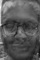

In [33]:
n_c = 400
proj = D[:n_c,:]
test_im = imag_arr[0,:]
# rec = ((proj.T@(proj@test_im))+np.mean(imag_arr, axis=0)).reshape((dims[1], dims[0]))
rec = (proj.T@proj@test_im).reshape((dims[1], dims[0]))
# rec = (test_im@proj@proj.T).reshape((dims[1], dims[0]))
print(rec)
Image.fromarray(np.uint8(rec))

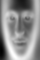

In [508]:
def scale(arr):
    return 255*(arr-np.min(arr))/(np.max(arr)-np.min(arr))
# Image.fromarray(np.uint8(D[1,:]).reshape(dims[1],dims[0]))
Image.fromarray(np.uint8(scale(D[5,:])).reshape(dims[1],dims[0]))

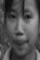

In [493]:
images[0]

In [484]:
rec

array([[ 89.74491079,  86.95773464,  86.23249658, ...,  86.99501061,
         88.67279327,  91.86345398],
       [ 89.34507735,  86.85824678,  86.32769218, ...,  87.08140539,
         88.37546881,  91.49980539],
       [ 89.13006652,  86.73743089,  86.64948763, ...,  87.04110348,
         88.24918279,  91.10020465],
       ...,
       [108.60957089, 108.03186369, 107.32457681, ..., 107.24056852,
        107.98049465, 108.66084029],
       [108.25795716, 107.8602669 , 107.33880091, ..., 107.29614313,
        107.77133696, 108.44592901],
       [107.93513932, 107.51611634, 107.12135627, ..., 107.22319959,
        107.54947842, 108.14727148]])

In [406]:
(proj.T@(test_im@proj)).shape

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1500 is different from 2400)

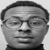

In [206]:
Image.fromarray(np.uint8(imag_arr[3,:].reshape(50,50)))

In [249]:
np.argmax(np.abs(w))

2499

In [503]:
255*D[4,:]

array([  8.60767467,   8.1293819 ,   6.61637366, ..., -10.42399639,
       -10.89898312, -10.99819138])

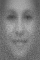

In [444]:
Image.fromarray(np.uint8(np.mean(imag_arr, axis=0) + 255*D[6,:]).reshape(dims[1], dims[0]))

In [65]:
D[:,0]

array([-0.02044449+0.j, -0.01783256+0.j, -0.02044449+0.j, ...,
       -0.02014646+0.j, -0.02038187+0.j, -0.02017757+0.j])